In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [ ]:
import zipfile 

#unzip 
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os 
# joindir ==> path   ,,,, listdir ==> files
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print ("\n content of train directory")
print(os.listdir(f'cats_and_dogs_filtered/train'))

print ("\n content of validation directory")
print(os.listdir(f'cats_and_dogs_filtered/validation'))

In [ ]:
train_dir = os.path.join('cats_and_dogs_filtered','train')
validation_dir = os.path.join('cats_and_dogs_filtered','validation')

dog_train_dir = os.path.join(train_dir,'dogs')
cat_train_dir = os.path.join(train_dir,'cats')

dog_val_dir = os.path.join(validation_dir,'dogs')
cat_val_dir = os.path.join(validation_dir,'cats')

In [ ]:
cat_fnames_dir = os.listdir(cat_train_dir)
dog_fnames_dir = os.listdir(dog_train_dir)

print(cat_fnames_dir[:7])
print(dog_fnames_dir[:7])

In [ ]:
#the total number of data

print('the total number of dogs training data is: ',len(os.listdir(dog_train_dir)))
print('the total number of cats training data is: ',len(os.listdir(cat_train_dir)))
print('\n')
print('the total number of dogs validating data is: ',len(os.listdir(dog_val_dir)))
print('the total number of cats validating data is: ',len(os.listdir(cat_val_dir)))

In [ ]:
%matplotlib inline 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#4x4 plot configuration 
nrows = 4 
ncols = 4    

pic_index = 0 #Index for iterating under images  

#testing
cat_fnames_dir[0:8]


In [ ]:
#plot config 
figure = plt.gcf()                        #create a matrix for images 
figure.set_size_inches(ncols*4,nrows*4)    #size of the matrix 


pic_index+=8 

next_cat_pix = [os.path.join(cat_train_dir , fname)
                for fname in cat_fnames_dir[ pic_index-8:pic_index]    #Selection of image paths by names of images in cat_train_dir path [0:8]
                ]
next_dog_pix = [os.path.join(dog_train_dir, fname) 
                for fname in dog_fnames_dir[ pic_index-8:pic_index]    
               ]            


for i, img_path in enumerate(next_cat_pix+next_dog_pix):              #enumerate ==>   (1,image1's path),(2,image2's path).... 
  sp=plt.subplot(nrows , ncols , i+1)    # image matrix 4x4    
  sp.axis(False)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neurons hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [ ]:
model.summary() 

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
#Data Training preprocessing
train_datagen = ImageDataGenerator (rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20 , class_mode = 'binary' , target_size=(150,150))

In [18]:
#Data Evaluation preprocessing 
test_datagen= ImageDataGenerator (rescale = 1.0/255)

validation_generator = test_datagen.flow_from_directory(validation_dir , batch_size=20 ,class_mode = 'binary',target_size = (150,150))

Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            )

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.5360

KeyboardInterrupt: ignored

In [23]:
#we saw that there are a big different between validation and training accuracy 
#data augmentation
#Data preprocessing and augmentation
#Data Training preprocessing
train_datagen = ImageDataGenerator (rescale=1.0/255,
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20 , class_mode = 'binary' , target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [ ]:
history2 = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            )

In [ ]:
#as we apply data augmentation on the trainig data we see tht the difference decreased and and we avoid overfitting problem 
#we need in this case more optimization to increase the validation and training accuracy (more rpochs , decreasing the learning_rate ... ) 
#we plot the graph to see the differente between theses two training experiences 

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

print('overfitting problem because of the difference between validation and training accuracy after the 3 firsts epochs') 

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
print('overfitting problem solved but the model need to be more trained and optimized')

In [19]:
#Dropout 

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neurons hidden layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(254, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(254, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [20]:
#training data without data augmentation
train_datagen = ImageDataGenerator (rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20 , class_mode = 'binary' , target_size=(150,150))

Found 2000 images belonging to 2 classes.


In [21]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [26]:
history3 = model.fit(
            train_generator,
            epochs=30,
            validation_data=validation_generator,
            )

Epoch 1/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5352 - accuracy: 0.7315 - val_loss: 0.4709 - val_accuracy: 0.7860
Epoch 2/30
100/100 [==============================] - 17s 174ms/step - loss: 0.5263 - accuracy: 0.7335 - val_loss: 0.5173 - val_accuracy: 0.7350
Epoch 3/30
100/100 [==============================] - 17s 173ms/step - loss: 0.5508 - accuracy: 0.7205 - val_loss: 0.4740 - val_accuracy: 0.7880
Epoch 4/30
100/100 [==============================] - 17s 173ms/step - loss: 0.5508 - accuracy: 0.7200 - val_loss: 0.4868 - val_accuracy: 0.7820
Epoch 5/30
100/100 [==============================] - 17s 172ms/step - loss: 0.5268 - accuracy: 0.7370 - val_loss: 0.4958 - val_accuracy: 0.7580
Epoch 6/30
100/100 [==============================] - 17s 173ms/step - loss: 0.5158 - accuracy: 0.7345 - val_loss: 0.4606 - val_accuracy: 0.7900
Epoch 7/30
100/100 [==============================] - 17s 173ms/step - loss: 0.5081 - accuracy: 0.7350 - val_loss: 0.4765 - val_ac

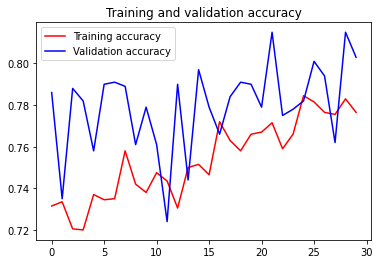

<Figure size 432x288 with 0 Axes>

overfitting problem solved but the model need to be more trained and optimized


In [27]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
print('overfitting problem solved but the model need to be more trained')